https://github.com/influxdata/influxdb-python
    
pip3 install influxdb

My db setup as in https://home-assistant.io/blog/2017/04/25/influxdb-grafana-docker/

SQL queries https://docs.influxdata.com/influxdb/v1.3/query_language/data_exploration/#the-basic-select-statement

Follow https://github.com/influxdata/influxdb-python/blob/master/examples/tutorial_pandas.py

In [1]:
"""Tutorial for using pandas and the InfluxDB client."""

import argparse
import pandas as pd
%matplotlib inline

from influxdb import DataFrameClient

In [2]:
#host='localhost'
host='192.168.0.30'
port=8086   # port of InfluxDB http API

"""Instantiate the connection to the InfluxDB client."""
user = 'root'
password = 'root'
dbname = 'home_assistant'

client = DataFrameClient(host, port, user, password, dbname)

In [3]:
fields = """ * """
measurement = """ "°C" """
filters = """WHERE "value" < 18.5 """

In [4]:
# query = """SELECT * FROM "°C" WHERE "value" < 18.5"""
query = """SELECT {} FROM {} {} """.format(fields, measurement, filters)
print("Performing a query: {}".format(query))

Performing a query: SELECT  *  FROM  "°C"  WHERE "value" < 18.5  


In [5]:
response = client.query(query)

In [6]:
print(response)

{'°C':                                          attribution_str  count_sensors  \
2017-10-29 06:04:13.941410048+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:04:29.987080192+00:00                 None            NaN   
2017-10-29 06:04:30.000286208+00:00                 None            NaN   
2017-10-29 06:04:30.382322176+00:00                 None            4.0   
2017-10-29 06:05:20.573617920+00:00                 None            NaN   
2017-10-29 06:05:20.587527936+00:00                 None            4.0   
2017-10-29 06:15:19.891108864+00:00                 None            NaN   
2017-10-29 06:15:50.893757952+00:00                 None            4.0   
2017-10-29 06:18:39.131664128+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:19:44.877958912+00:00                 None            NaN   
2017-10-29 06:25:17.880882944+00:00                 None            NaN   
2017-10-29 06:33:03.213550080+00:00  Powered by Dark Sky            NaN   
2017-10-29 06:34:4

In [7]:
print(response.keys())

dict_keys(['°C'])


In [8]:
response_df = pd.DataFrame.from_dict(response['°C'])

In [9]:
response_df

,attribution_str,count_sensors,domain,entity_id,friendly_name,friendly_name_str,icon_str,max_value,mean,min_value,value
2017-10-29 06:04:13.941410048+00:00,Powered by Dark Sky,NaN,sensor,darksky_sensor_temperature,None,Outside temperature,mdi:thermometer,NaN,NaN,NaN,13.90
2017-10-29 06:04:29.987080192+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.33
2017-10-29 06:04:30.000286208+00:00,None,NaN,sensor,hall_temperature,None,Hall temperature,None,NaN,NaN,NaN,17.30
2017-10-29 06:04:30.382322176+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.12,18.44,17.3,18.44
2017-10-29 06:05:20.573617920+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.47
2017-10-29 06:05:20.587527936+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.12,18.47,17.3,18.47
2017-10-29 06:15:19.891108864+00:00,None,NaN,sensor,bedroom_temperature,None,Bedroom temperature,None,NaN,NaN,NaN,18.33
2017-10-29 06:15:50.893757952+00:00,None,4.0,sensor,mean_temperature,None,Mean temperature,mdi:calculator,19.26,18.47,17.3,18.47
2017-10-29 06:18:39.131664128+00:00,Powered by Dark Sky,NaN,sensor,darksky_sensor_temperature,None,Outside temperature,mdi:thermometer,NaN,NaN,NaN,13.80
2017-10-29 06:19:44.877958912+00:00,None,NaN,sensor,hall_temperature,None,Hall temperature,None,NaN,NaN,NaN,17.44


In [10]:
response_df.columns

Index(['attribution_str', 'count_sensors', 'domain', 'entity_id',
       'friendly_name', 'friendly_name_str', 'icon_str', 'max_value', 'mean',
       'min_value', 'value'],
      dtype='object')

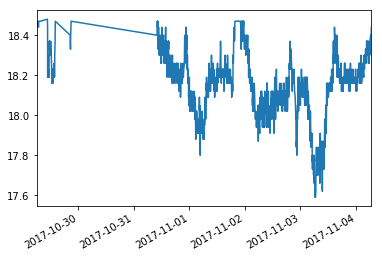

In [11]:
response_df[response_df['friendly_name_str'] == 'Mean temperature']['mean'].plot()

## Chechup on my BME sensor

In [12]:
fields = """ * """
measurement = """ "%" """
filters = """ """
query = """SELECT {} FROM {} {} """.format(fields, measurement, filters)
print("Performing a query: {}".format(query))

Performing a query: SELECT  *  FROM  "%"    


In [14]:
response = client.query(query)

In [15]:
print(response.keys())

dict_keys(['%'])


In [16]:
response_df = pd.DataFrame.from_dict(response['%'])

In [17]:
response_df.head()

,Battery Level,Battery State_str,Device Name_str,Device Type_str,Device Version_str,attribution_str,domain,entity_id,friendly_name,friendly_name_str,icon,icon_str,value
2017-10-29 06:04:10.650359040+00:00,NaN,None,None,None,None,None,sensor,bme680humidity,680.0,bme680-humidity,NaN,None,55.90
2017-10-29 06:04:10.663592960+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.37
2017-10-29 06:04:11.714415104+00:00,NaN,None,None,None,None,None,sensor,bme680humidity,680.0,bme680-humidity,NaN,None,55.91
2017-10-29 06:04:12.683585792+00:00,NaN,None,None,None,None,None,sensor,bme680humidity,680.0,bme680-humidity,NaN,None,55.92
2017-10-29 06:04:13.686959872+00:00,NaN,None,None,None,None,None,sensor,bme680humidity,680.0,bme680-humidity,NaN,None,55.90


In [33]:
response_df['entity_id'].unique()

array(['bme680humidity', 'bme680air_qual',
       'darksky_sensor_precip_probability', 'robins_iphone_battery_level',
       'iphone_battery_level', 'cpu_load_total', 'memory_usage_real',
       'volume_used_volume_1'], dtype=object)

In [29]:
bme680air_qual_df = response_df[response_df['entity_id'] == 'bme680air_qual']

In [32]:
bme680air_qual_df.tail()

,Battery Level,Battery State_str,Device Name_str,Device Type_str,Device Version_str,attribution_str,domain,entity_id,friendly_name,friendly_name_str,icon,icon_str,value
2017-10-29 08:47:11.739813120+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.51
2017-10-29 08:47:12.737668096+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.50
2017-10-29 08:47:13.813604096+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.51
2017-10-29 08:47:14.757925120+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.52
2017-10-29 08:47:16.767986944+00:00,NaN,None,None,None,None,None,sensor,bme680air_qual,680.0,bme680-air_qual,NaN,None,93.53


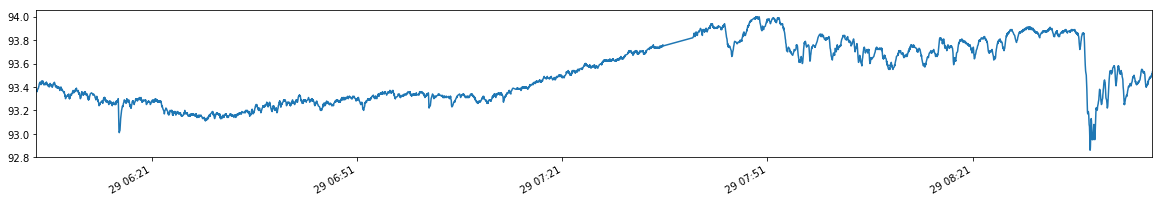

In [31]:
bme680air_qual_df['value'].plot(figsize=(20,3))

Data runs out on 29th..??

In [34]:
bme680humidity_df = response_df[response_df['entity_id'] == 'bme680humidity']

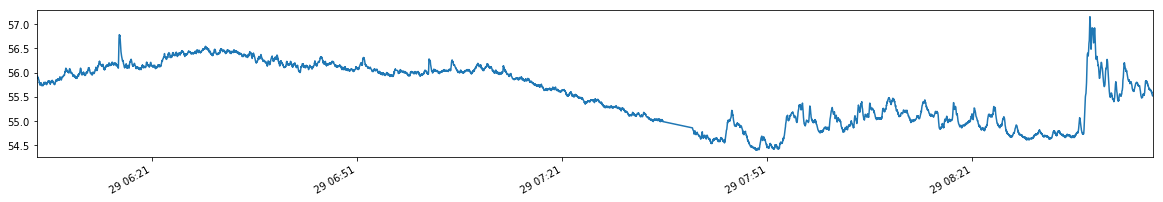

In [35]:
bme680humidity_df['value'].plot(figsize=(20,3))